### What is a class and what an object?

Python is an object oriented language.

While programming is about data and the functions that manuipulate them, objects can hold both data and functions in a single construct.

A class is a blueprint, on which objects can be created. 

Similalry to functions, a class is code that is not executed at the location it is written. Instead, when we need the functionality of a class we create an object of that class. 

Most things in python are objects. 

Objects of a certain class are created by calling a specific function of the class called the constructor. Lets see an example.

In [1]:
# A very common class is the 'string' class
# which in python has been shortened to 'str' 

# here we create an object of the class str 
# we initialize it to hold the text George Sioros 
# and we assign it to the variable myName

myName = str("George Sioros")
print (myName)

George Sioros


In [2]:
# we can call other the functions of an object (besides the constructor) to manipulate the data it holds
# we use a '.' to access the 'member' functions of the object

print(myName.swapcase()) # this function of the array class swaps the case of each character (Lower <-> Upper)

gEORGE sIOROS


In [3]:
# and here we create a numpy array and assing it to the variable myLottoTicket

import numpy as np

myLottoTicket = np.array([1, 32, 4, 25, 18, 9])

print(myLottoTicket)

[ 1 32  4 25 18  9]


In [4]:
# we can then sort the numbers by calling the member function sort()

myLottoTicket.sort() 

print(myLottoTicket)

[ 1  4  9 18 25 32]


#### user defined classes

Besides creating objects of a predefined class we can define our own classes.

The definition of a class begins with the keyword <code>class</code> followed by the name we want to give to the class. 

The common python syntax rules apply:

>1) The first line ends with <code>:</code>

>2) The block of code belonging to the class must be indented and algined.


Every function that belongs to the class takes at least one input parameter. 

That first input is always the variable <code>self</code>, which contains the object itself. In this way, the function has access to the member variables and functions of the specific object. 



To create and initialize the member variables of an object at the moment of its contruction we need to define the <i>constructor </i> of the class.

The constructor is a special function that is called once, when the object is created. 

In python the constructor is always named <code>\_\_init\_\_</code>.


In [5]:

class counter: # here we define a new class named counter
    
  
    def __init__(self, initial_value = 0 ): # the "counter" constructor takes one parameter with default value 0
        self.v = initial_value #it then defines the member variable v by assings an initial value to 
        
    def increase(self, x = 1): #counter has one member function 
        self.v += x
        

In [6]:
# lets create a couple of counter objects

m = counter()
k = counter()

# increase the m counter 10 times by 1
for i in range(0,10):
    m.increase()

# increase the k counter 5 times by 2
for i in range(0,5):
    k.increase(2) # when calling a member function we omit the self argument!

# we can access directly the member variables of the objects:
print(m.v, k.v)

10 10


In [7]:
m = counter(5)

for i in range(0,5):
    m.increase(2)
    
print(m.v)

15


Some times we need certain members to be visible only to other members of the class.

For instance, we may want to keep the value of a counter object hidden from the user, so that it is not changed by mistake!

We can create such <i>private</i> variables by preceding them with <code>__</code> (double underscore)

In [8]:
class counter:
    
   
    def __init__(self, initial_value = 0 ): 
        self.__v = initial_value
        
    def increase(self, x = 1):
        self.__v += x
        
    def getValue(self): # as the variable __v is private, a function is needed to to return its value
        return self.__v
    

In [9]:
m = counter(5)
m2 = counter(6)

for i in range(0,5):
    m.increase(2)
    
print(m.getValue())
print(m2.getValue())


15
6


## Class inheritance 

Often we need a several different classes with some similar basic functionality. Object oriented programming allows us to define new classes based on an existing one. The new class will include all the functions and variables of the existing class and will extpand it with new functions and variables.

The new class is said to be the child of the existing class. Alternatively we refer to them as the derived and the base class. In any case, the derived class inherits the members of its base class.

A derived class can inherit from mulitple base classes. 



In [10]:
# this is a simple example

#the simple class implements a multiplier. 
# It stores a multiplication factor
# it includes a function that returns the product of the multiplication and an input parameter

class simple: 
    def __init__(self):
        self.__factor = 2
        
    def multiply(self, v): #returns the product of the factor and the input v
        return v*self.__factor
    
#the derived class extends the multiplier to include a divisor
# it stores the divisor in a seperate variable
# and incldues a function that divides the input parameter by the stored divisor

class advanced( simple ): #the derived class inherits all members from the base class
    def __init__(self):
        super().__init__() #the constructor of the base class is called by calling the function super()
        #the base class __init__ creates the factor variable
        self.__divisor = 3 # and the derived class __init__ creates an additional variable

    def divide(self,v): # the derived class has also a new function
        return v/self.__divisor
    

In [11]:
# lets create two objects from the above classes

simpleOp = simple()

advancedOp = advanced()


In [12]:
print(simpleOp.multiply(10))

20


In [13]:
print(advancedOp.multiply(10))
print(advancedOp.divide(10))

20
3.3333333333333335


#### The following is more complex example inspired by audio processing:

We will define two classes. 

The base class is a simple audio effect. It only applies a constant gain to an input audio buffer. 

The derived class will extend this functionality to apply also a fade in at the begining of the buffer. 



In [14]:
class audioEffect:
    
    def __init__ (self): #constructor for the generic audio effect
        self.__gain = 1. #create the gain member variable (private) and assing it the value 1
    
    def setGain(self, gain): # sets the gain
        self.__gain = gain
        
    def getGain(self): #returns the gain
        return self.__gain
    
    def apply(self, buffer): # multiply the input buffer with the gain factor
        buffer *= self.__gain        

    
    
class fadeIn(audioEffect): #the fadeIn fx inherits all members (functions and variables) from the audioEffect
    
    def __init__ (self, dur): # constructor for the fadeIn fx        
        super().__init__() #call the audioEffect constructor        
        self.__FadeInDur = dur # and then create the private variable that stores the fade in duration (in samples) 

        # note that when using super() to get to the base class, we do not need to include the self as input parameter!
        
        
    def setDur(self, dur): #set the fade in duration (in samples)
        self.__FadeInDur = dur
        
    def getDur(self): #returns the fade in duration
        return self.__FadeInDur
    
    def apply(self, buffer): # apply the fade in fx
        
        super().apply(buffer) # first, apply the generic audioEffect first (gain)
        
        ramp = np.linspace(0, 1, num=self.__FadeInDur) #create a ramp for the fade in
        buffer[0:ramp.size] *= ramp #apply the ramp only to the begining of the array      

In [15]:
sound = 2*np.random.random(1000)-1

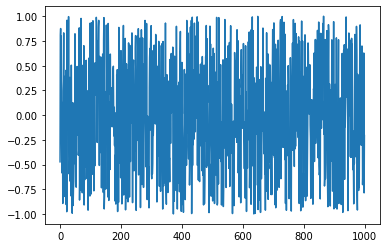

In [16]:
import matplotlib.pyplot as plt
plt.plot(sound)

In [17]:
FX1 = audioEffect()
FX1.setGain(2.)
print(FX1.getGain())

FX2 = fadeIn(200)
FX2.setGain(1.5)
print(FX2.getDur())
print(FX2.getGain())

2.0
200
1.5


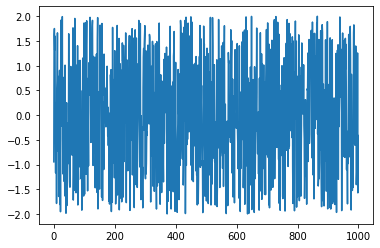

In [18]:
FX1.apply(sound)
plt.plot(sound)

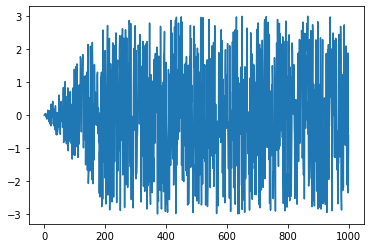

In [19]:
FX2.apply(sound)
plt.plot(sound)

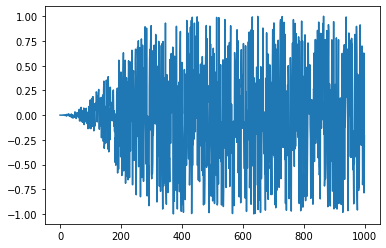

In [20]:
FX2.setDur(300)
FX2.setGain(1/3)
FX2.apply(sound)
plt.plot(sound)